<a href="https://colab.research.google.com/github/HIJADI/Data-Science-Portfolio/blob/main/project1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1: Transaction Success Prediction with GussianNB


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

In this project we want to predict whether or not a customer will make a transaction based on their transaction data, build a model for predicting .

binary classification **problems**

The project should be done using the Gaussian Naive Bayes classification techniques as covered in class. In this directory is included a recommended "To Do" list for the project.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv

## Data Collection/Sources


In [1]:
# import all the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [2]:
# read csv file and put it in pandas dataframe

file_loc = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv'
data = pd.read_csv(file_loc)
data


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning


In [3]:
# make a backup copy of the loaded data
data_orig = data.copy()

# check target data for nans and binary
data['target'].value_counts(dropna=False)


,count
target,
NaN,870000
0.0,161960
1.0,18040


In [4]:
# drop columns that are not useful
print(data['ID_code'].value_counts(dropna=False))
print("\n")
print(data['Unnamed: 0'].value_counts())
print("\n")
print(data.nunique().sort_values())
# data.info()


ID_code
train_1049983    1
train_1049982    1
train_1049981    1
train_1049980    1
train_1049979    1
                ..
train_4          1
train_3          1
train_2          1
train_1          1
train_0          1
Name: count, Length: 1050000, dtype: int64


Unnamed: 0
1049983    1
1049982    1
1049981    1
1049980    1
1049979    1
          ..
4          1
3          1
2          1
1          1
0          1
Name: count, Length: 1050000, dtype: int64


var_3               0
var_10              0
var_12              0
var_11              0
var_9               0
               ...   
var_94         131746
var_86         134537
var_52         137280
Unnamed: 0    1050000
ID_code       1050000
Length: 104, dtype: int64


In [5]:
data.drop(['Unnamed: 0', 'ID_code'], axis=1, inplace=True)
data


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.4760,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,-6.8112,7.3226,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,1.6614,6.1486,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# deal with null/nan values
data.isna().sum()


,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_3,1050000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [7]:
# filter null targets
print(data['target'].isna().sum())
filter = data['target'].isna()


870000


In [8]:
# drop rows with null targets
data.dropna(subset=['target'], inplace=True)
data


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.4760,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,-6.4882,6.0821,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
11,0.0,4.4949,14.4142,13.2219,NaN,4.9140,NaN,NaN,4.0501,5.8144,...,NaN,13.9424,NaN,-15.5776,NaN,NaN,NaN,NaN,NaN,14.1222
15,0.0,4.9657,16.2867,17.9579,NaN,0.6017,NaN,NaN,-5.4904,6.6670,...,NaN,3.7943,NaN,5.6184,NaN,NaN,NaN,NaN,NaN,14.0619
19,0.0,9.4287,18.7822,10.7630,NaN,-0.7532,NaN,NaN,8.8477,6.8045,...,NaN,-5.6677,NaN,-1.8961,NaN,NaN,NaN,NaN,NaN,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,NaN,2.9322,NaN,NaN,5.0267,7.1953,...,NaN,10.4219,NaN,-19.7158,NaN,NaN,NaN,NaN,NaN,14.0582
1049993,0.0,5.0862,14.4785,17.3709,NaN,-2.4732,NaN,NaN,-2.5987,6.6798,...,NaN,-2.8052,NaN,-13.7290,NaN,NaN,NaN,NaN,NaN,14.3794
1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,-6.8112,7.3226,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,1.6614,6.1486,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689


In [9]:
# deal with null/nan values in other features/columns
print(data.isna().sum())
allnans_filter = data.isna().sum() == data.shape[0]
print(allnans_filter.sum())

allnans = data.columns[allnans_filter]
print(allnans)


target          0
var_0           0
var_1           0
var_2           0
var_3      180000
            ...  
var_96     180000
var_97     180000
var_98     180000
var_99     180000
var_100         0
Length: 102, dtype: int64
51
Index(['var_3', 'var_5', 'var_6', 'var_9', 'var_10', 'var_11', 'var_12',
       'var_13', 'var_16', 'var_18', 'var_19', 'var_23', 'var_25', 'var_30',
       'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_40', 'var_42',
       'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_50', 'var_51',
       'var_53', 'var_54', 'var_55', 'var_58', 'var_59', 'var_60', 'var_64',
       'var_68', 'var_69', 'var_71', 'var_74', 'var_76', 'var_77', 'var_79',
       'var_81', 'var_90', 'var_91', 'var_93', 'var_95', 'var_96', 'var_97',
       'var_98', 'var_99'],
      dtype='object')


In [10]:
# drop columns with all nans
data.drop(allnans, axis=1, inplace=True)
data

# or just
# df.dropna(axis=1, how='all', inplace=True)


,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  floa

## Exploratory Data Analysis


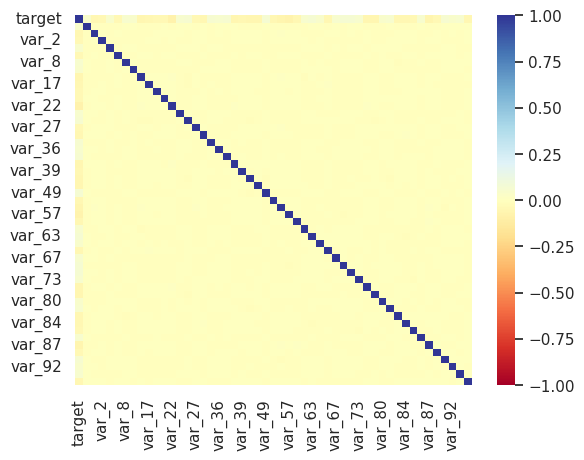

In [12]:
# corr plot
corr = data.corr()
sns.set()
sns.heatmap(corr, cmap='RdYlBu',annot = False, vmin = -1, vmax = 1);


In [13]:
# pairplot takes too long, large number of variable
#sns.set()
#sns.pairplot(data)


Text(0.5, 1.0, 'Correlation to Target')

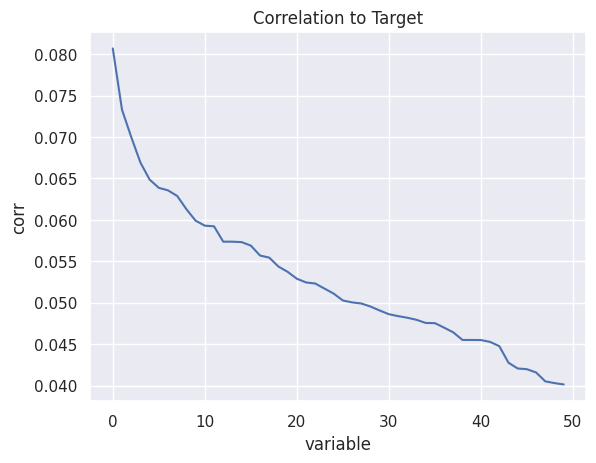

In [14]:
# plot correlations to target
# negative correlation are also of interest,
# take the absolute value, `abs()`.

corr_unstacked = corr.unstack()
corr_unstacked_not_self = corr_unstacked[ corr_unstacked != 1 ]
corr_sorted = corr_unstacked_not_self['target'].abs().sort_values(ascending = False)
#print(corr_sorted)

sns.lineplot(x='variable', y='corr', data=pd.DataFrame(
    {'variable': range(0, corr_sorted.shape[0]),
     'corr': corr_sorted})).set_title('Correlation to Target')


<Axes: >

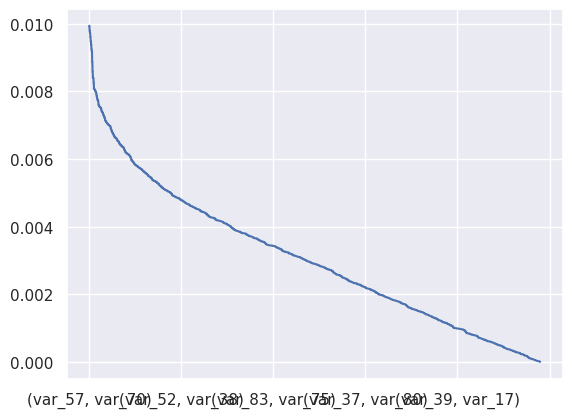

In [16]:
# plot pair correlations among the features
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
corr_pair[[
    'target' not in i
      for i in corr_pair.index
]].plot()


<Axes: >

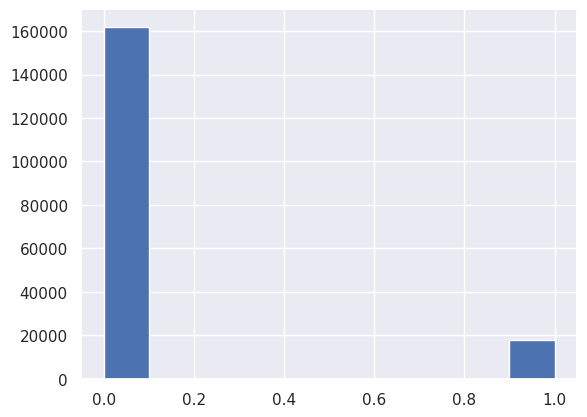

In [17]:
# histogram of unbalanced target
data['target'].hist()


array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_4'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>],
       [<Axes: title={'center': 'var_14'}>,
        <Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_20'}>,
        <Axes: title={'center': 'var_21'}>,
        <Axes: title={'center': 'var_22'}>,
        <Axes: title={'center': 'var_24'}>],
       [<Axes: title={'center': 'var_26'}>,
        <Axes: title={'center': 'var_27'}>,
        <Axes: title={'center': 'var_28'}>,
        <Axes: title={'center': 'var_29'}>,
        <Axes: title={'center': 'var_36'}>,
        <Axes: title={'center': 'var_37'}>,
        <Axes: title={'center': 'var_38'}>],
       [<Axes: title={'center': 'var_39'}>,
        <Axes: title={'center': 'va

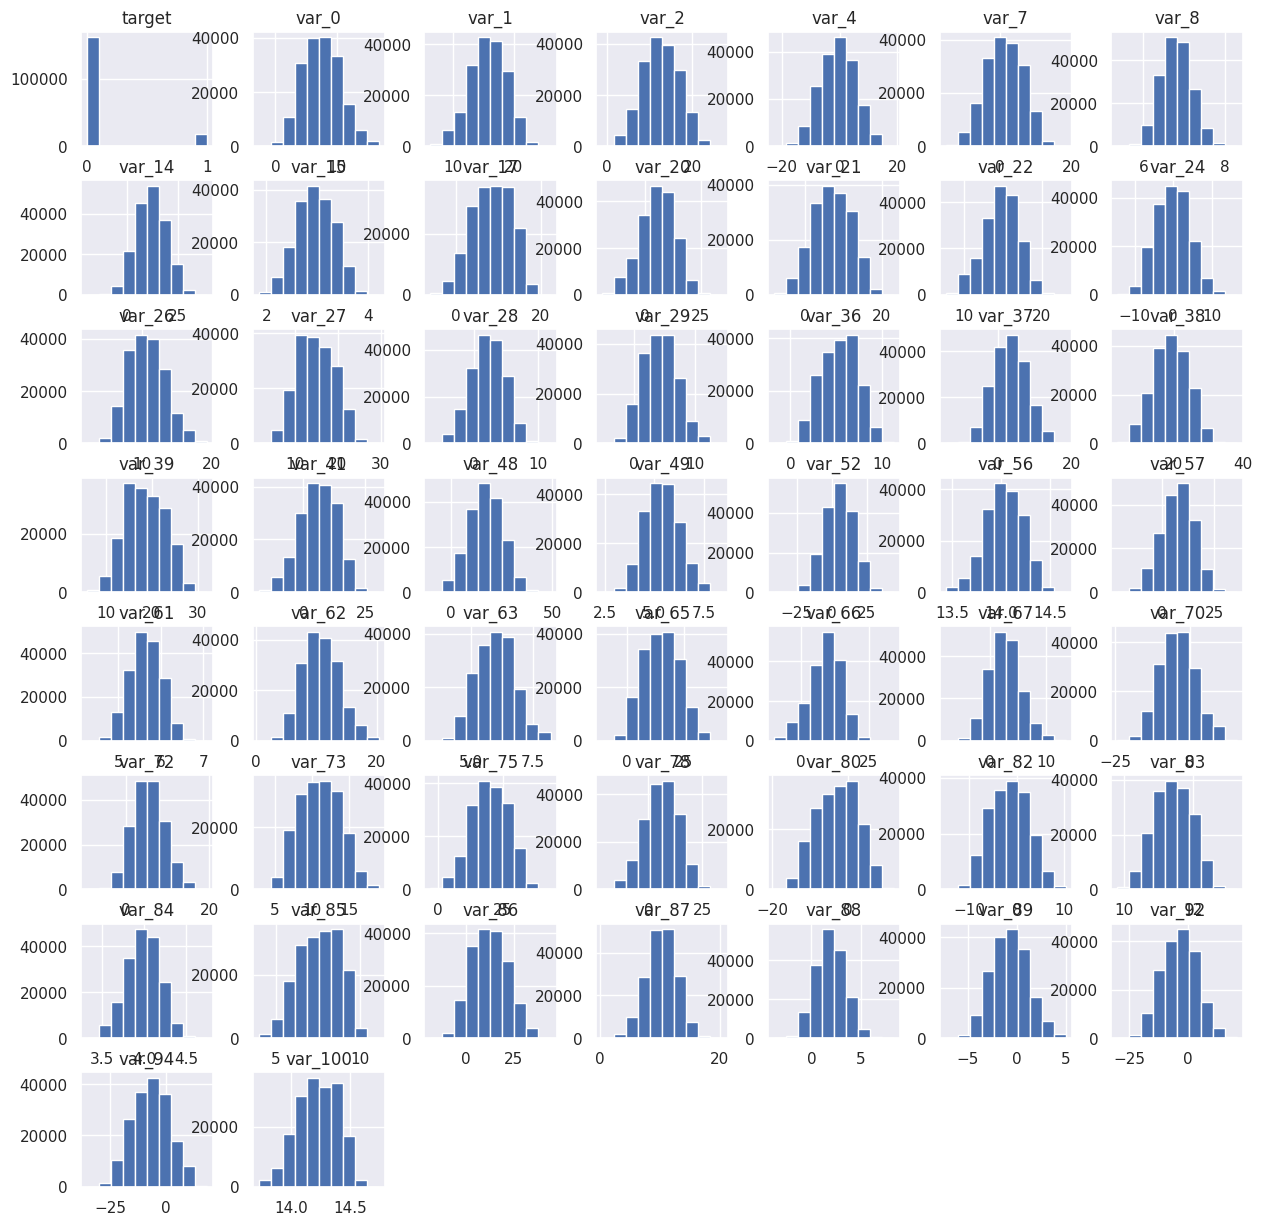

In [18]:
# histogram all features

data.hist(figsize=(15,15))


In [ ]:
# skip pairplot takes too long for 50+ features
# sns.set()
# sns.pairplot(data)


Statistic: 0.4403499179978152, P-value: 0.8023784023590778


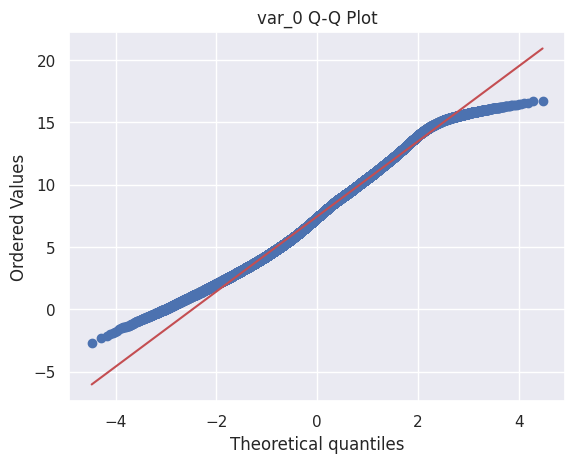

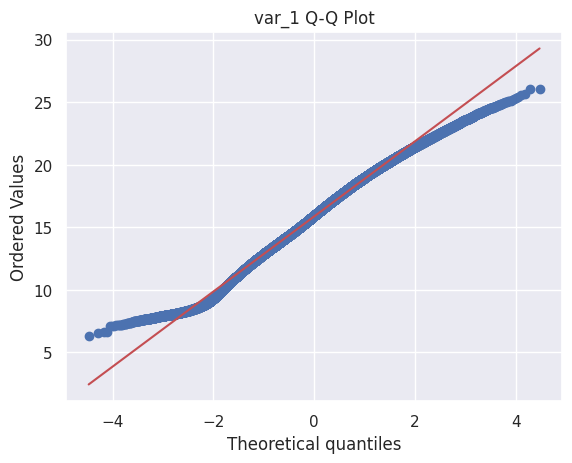

In [19]:
# take a look at Q-Q plots to normal distribution

var = np.random.normal(loc=0, scale=1, size=100) # Example normal data

statistic, p_value = stats.normaltest(var)
print(f"Statistic: {statistic}, P-value: {p_value}")

# try it for some features
for v in range(1,3): # eg for var_1 and var_2
  var = data.iloc[:,v]
  statistic, p_value = stats.normaltest(var)
  stats.probplot(var, dist="norm", plot=plt)
  plt.title(f"{data.columns[v]} Q-Q Plot")
  plt.show()

## Processing



Number of mislabeled points out of a total 36000 points : 3211
Number of balanced mislabeled points out of a total 36000 points : 8705


<Axes: >

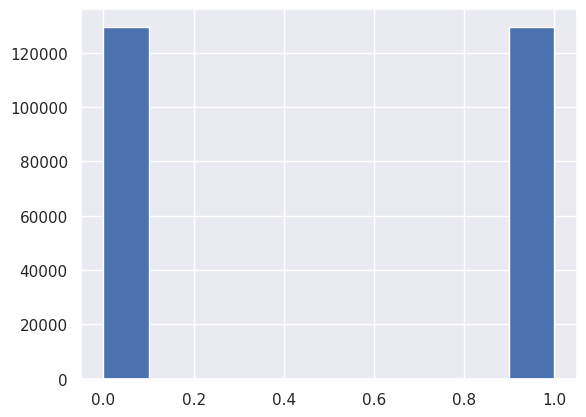

In [20]:
# try building a signle model with unbalanced target

gnb = GaussianNB()

y = data['target'].copy()
X = data.drop('target', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# Apply SMOTE to balance the training data

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
gnb_balanced = GaussianNB()
gnb_balanced.fit(X_train, y_train)
gnb_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = gnb_balanced.predict(X_test)

print("Number of balanced mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_balanced).sum()))

# histogram of unbalanced target
y_train_balanced.hist()


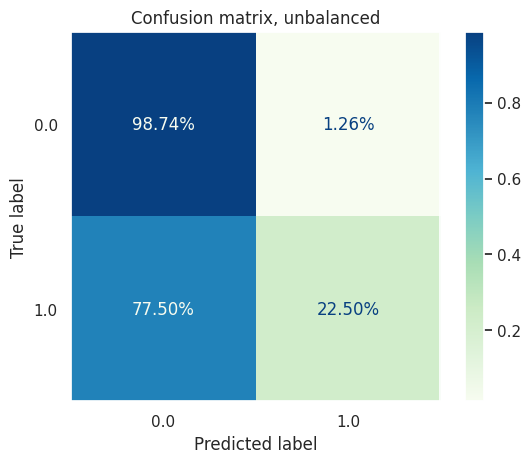

In [21]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix, unbalanced') ;
#plt.savefig('confusion_matrix.png')


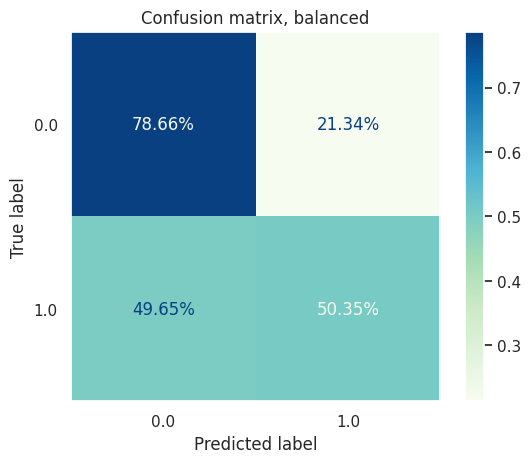

In [22]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb_balanced,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix, balanced') ;
#plt.savefig('confusion_matrix.png')

In [23]:
def cross_validate(X, y, num_loops, test_size=0.2, by_smote=False):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """
  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = test_size)
    if by_smote:
      # Apply SMOTE to balance the training data
      smote = SMOTE() # random_state=0)
      X_train, y_train = smote.fit_resample(X_train, y_train)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores


0.91121


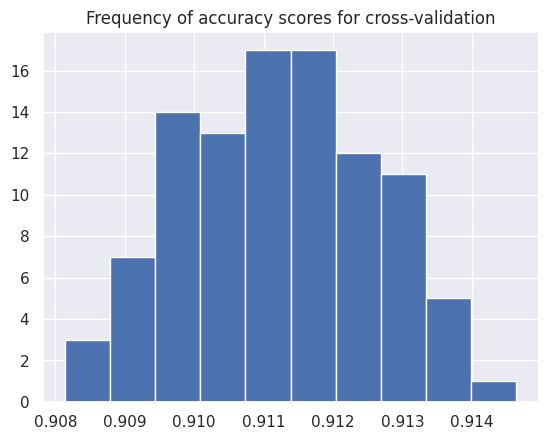

In [24]:
accuracy_scores = cross_validate(X, y, 100, 0.2)
print(round(accuracy_scores.mean(), 5))
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

0.75274


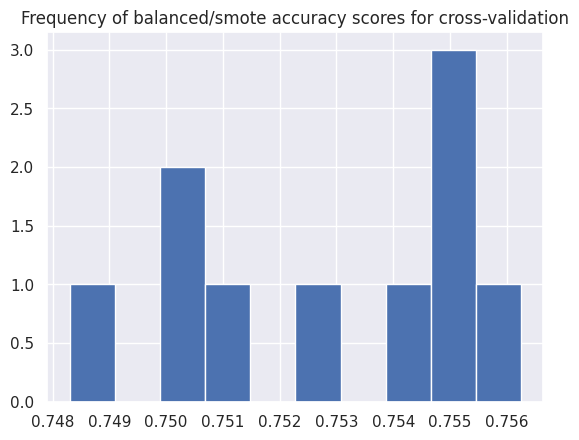

In [25]:
# try it with smote balancing, it's slow just doing 10 for now
accuracy_scores_smote = cross_validate(X, y, 10, 0.2, True)
print(round(accuracy_scores_smote.mean(), 5))
plt.hist(accuracy_scores_smote)
plt.title('Frequency of balanced/smote accuracy scores for cross-validation')
plt.show()

Number of mislabeled points out of a total 36000 points : 3666
0.89994


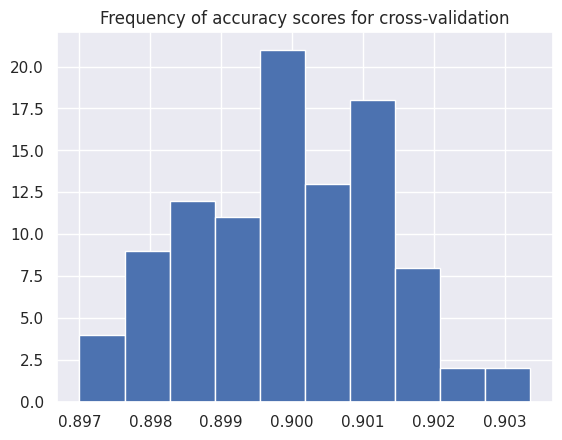

In [26]:
# model using just a few of the variables

X1_train, X1_test, y1_train, y1_test = train_test_split(X.iloc[:,1:2], y, test_size=0.20) #, random_state=0)

gnb.fit(X1_train, y1_train)

y1_pred = gnb.predict(X1_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X1_test.shape[0], (y1_test != y1_pred).sum()))

X_split = X.iloc[:, 1:2]
accuracy_scores = cross_validate(X_split, y, 100, 0.2)
print(round(accuracy_scores.mean(), 5))
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()


In [ ]:
# X_split = X #.iloc[:, 40:]
# accuracy_scores = cross_validate(X_split, y, 100, 0.2)
# print(round(accuracy_scores.mean(), 5))
# plt.hist(accuracy_scores)
# plt.title('Frequency of accuracy scores for cross-validation')
# plt.show()

## Data Visualization/Communication of Results
